# [Deep Learning](https://github.com/M-Sc-AUT/M.Sc-Computer-Architecture/tree/main/Deep%20Learning) - Spring 2024
#### [Reza Adinepour](https://github.com/rezaAdinepour)
#### Stu.ID: 402131055

## Question 3 Part C:
In this part we will aproximate polynomial function single layer perceptron

### import libraries

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn, optim
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score

### check GPU availability

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### create x points

In [4]:
x = torch.linspace(-10, 10, 1000, device=device)
print(x.size())

torch.Size([1000])


### calculate taylor series for $f(x)$ around $0$

In [5]:
def taylor_approximation(x, n):
    
    sin_x = sum(((-1) ** i * x ** (2 * i+1)) / torch.math.factorial(2 * i+1) for i in range(n))

    x_17 = x**17 
    x_2 = x**2

    f_taylor = sin_x + 3 * x_17 - 5 * x_2

    return f_taylor

In [6]:
f_orginal = torch.sin(x) + 3 * x**17 - 5 * x**2

f_approx = torch.zeros(10, x.size(0))
for i in range(10):
    f_approx[i] = taylor_approximation(x, i+1)

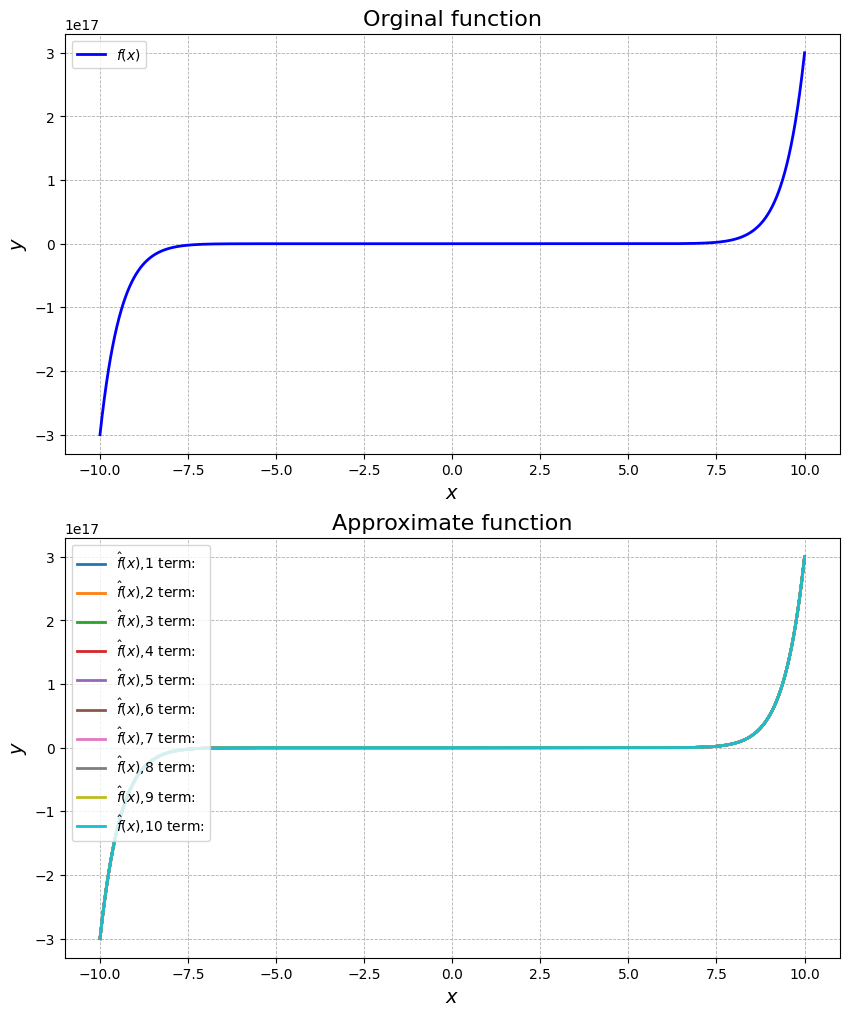

In [7]:
plt.figure(figsize=(10, 12))

# plot orginal function
plt.subplot(2, 1, 1)
plt.title("Orginal function", fontsize=16)
plt.plot(x.cpu().numpy(), f_orginal.cpu().numpy(), linestyle='-', color='blue', linewidth=2, label="$f(x)$")
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid(linestyle='--', linewidth=0.6)
plt.legend()


# plot approx function
for i in range(10):
    plt.subplot(2, 1, 2)
    plt.title("Approximate function", fontsize=16)
    plt.plot(x.cpu().numpy(), f_approx[i].cpu().numpy(), linestyle='-', linewidth=2, label="$\hat{f}(x)$," + str(i+1) + " term:")
    plt.xlabel('$x$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid(linestyle='--', linewidth=0.6)
    plt.legend()

plt.show()


### Define single layer perceptron class
* Neuron number: 1
* Number of inputs: 2
* Activation function: Sigmoid

In [8]:
class single_layer_perceptron(nn.Module):
    def __init__(self, input_size):
        super(single_layer_perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

In [17]:
x2 = torch.pow(x, 2)
x3 = torch.pow(x, 3)
x5 = torch.pow(x, 5)
x7 = torch.pow(x, 7)
x9 = torch.pow(x, 9)
x17 = torch.pow(x, 17)

x_feature = torch.stack((x, x2, x3, x5, x7, x9, x17), dim=1)
# x_feature = x - 5 * x2 - (1/6) * x3 + (1/120) * x5 - (1/5040) * x7 + (1/362880) * x9 + 3 * x17
y = torch.sin(x) + 3 * x17 - 5 * x2


print(x_feature.size())

torch.Size([1000, 7])


In [22]:
model = single_layer_perceptron(x_feature.size(1)).to(device) # create model
epochs = 500


# define loss function and optimizer
criterion = nn.MSELoss() # unsing mean squared error for loss function
optimizer = optim.SGD(model.parameters(), lr=0.01) # using stochastic gradient descent for optimization



x = x.view(-1, 1)



# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train the model
for epoch in range(1000):
    # Forward pass
    outputs = model(x)
    loss = criterion(outputs, y.float())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{1000}, Loss: {loss.item()}')

# Get the final model predictions
final_outputs = model(x).detach().numpy()

# Plot the data and the fitted line
plt.scatter(x, y, label='Data')
plt.plot(x, final_outputs, label='Fitted line', color='red')
plt.legend()
plt.show()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1000x1 and 7x1)